# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the functions we will use:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

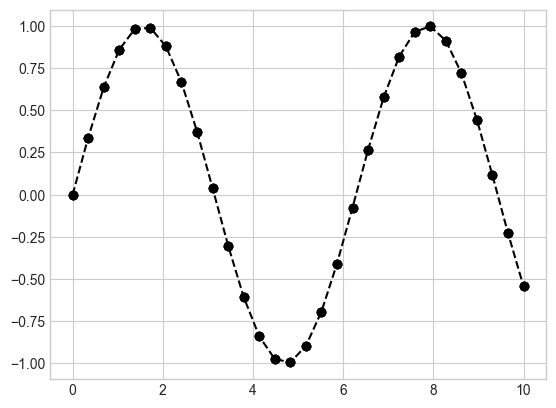

In [7]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black') # Forma larga
plt.plot(x, y, 'ok'); # Forma corta
plt.plot(x, y, '--ok'); # Forma corta y le puedo meter mas cosas

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

El tercer argumento en la llamada de función es un carácter que representa el tipo de símbolo utilizado para el trazado. Así como puede especificar opciones como ``'-'``, ``'--'`` para controlar el estilo de línea, el estilo de marcador tiene su propio conjunto de códigos de cadena corta. La lista completa de símbolos disponibles se puede ver en la documentación de ``plt.plot``, o en la documentación en línea de Matplotlib. La mayoría de las posibilidades son bastante intuitivas, y mostraremos algunas de las más comunes aquí:

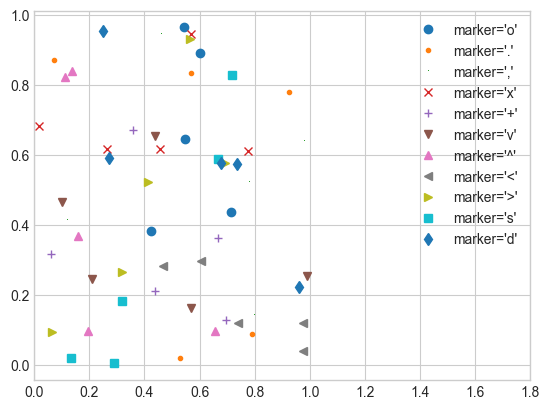

In [8]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend()
plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

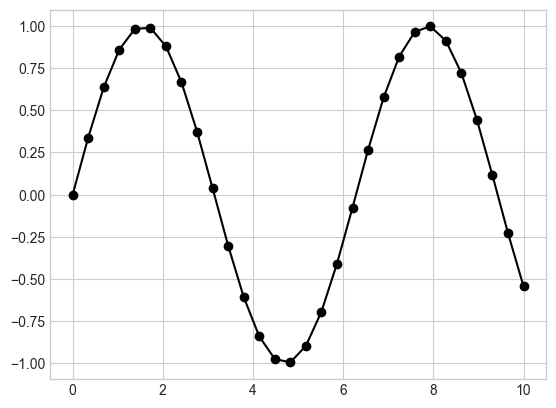

In [9]:
plt.plot(x, y, '-ok');

Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

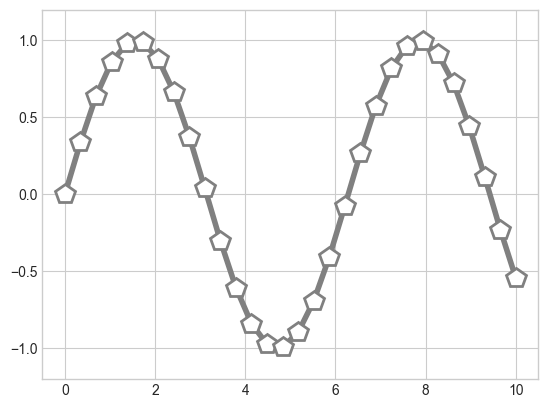

In [10]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

This type of flexibility in the ``plt.plot`` function allows for a wide variety of possible visualization options.
For a full description of the options available, refer to the ``plt.plot`` documentation.

## Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

Un segundo método más poderoso para crear diagramas de dispersión es la función ``plt.scatter``, que se puede usar de manera muy similar a la función ``plt.plot``:

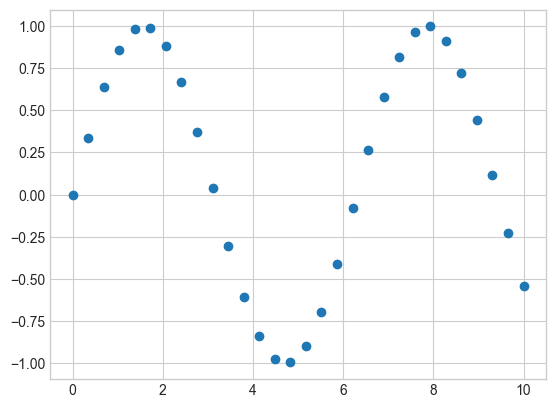

In [11]:
plt.scatter(x, y, marker='o');

**The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.**

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

**La principal diferencia entre ``plt.scatter`` y ``plt.plot`` es que se puede usar para crear diagramas de dispersión donde las propiedades de cada punto individual (tamaño, color de cara, color de borde, etc.) puede controlarse individualmente o asignarse a los datos.**

Mostremos esto creando un gráfico de dispersión aleatoria con puntos de muchos colores y tamaños.
Para ver mejor los resultados superpuestos, también usaremos la palabra clave ``alpha`` para ajustar el nivel de transparencia:

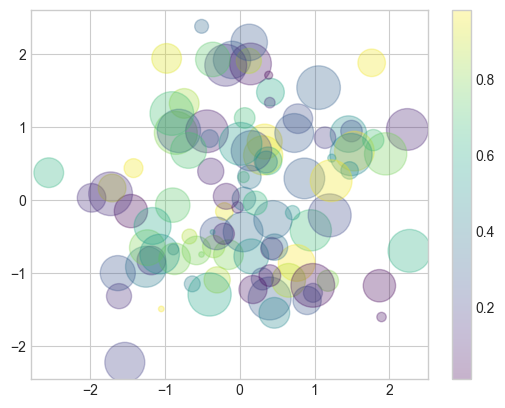

In [12]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis') # Escogiendo directamente una paleta de colores
plt.colorbar();  # show color scale / Leyenda de colores

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

Tenga en cuenta que el argumento de color se asigna automáticamente a una escala de color (que se muestra aquí con el comando ``colorbar()``), y que el argumento de tamaño se proporciona en píxeles.
De esta forma, el color y el tamaño de los puntos se pueden utilizar para transmitir información en la visualización, con el fin de visualizar datos multidimensionales.

Por ejemplo, podríamos usar los datos de Iris de Scikit-Learn, donde cada muestra es uno de los tres tipos de flores en las que se ha medido cuidadosamente el tamaño de sus pétalos y sépalos:

In [15]:
from sklearn.datasets import load_iris
import pandas as pd
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_iris['target'] = iris['target']
df_iris['target'] = df_iris['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


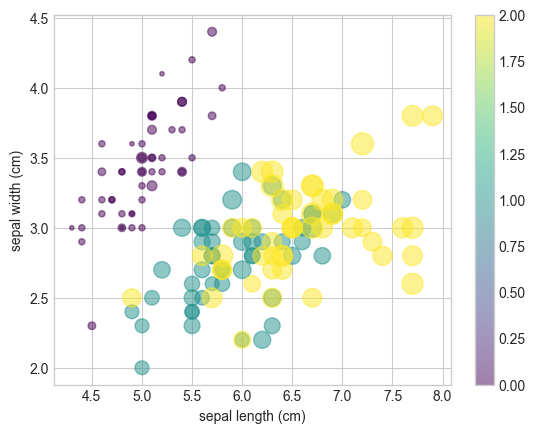

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=.5,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar();

We can see that this scatter plot has given us the ability to **simultaneously explore four different dimensions of the data:**
the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

Podemos ver que este gráfico de dispersión nos ha dado la capacidad de **explorar simultáneamente cuatro dimensiones diferentes de los datos:**
la ubicación (x, y) de cada punto corresponde a la longitud y el ancho del sépalo, el tamaño del punto está relacionado con el ancho del pétalo y el color está relacionado con la especie de flor en particular.
Los diagramas de dispersión multicolores y de características múltiples como este pueden ser útiles tanto para la exploración como para la presentación de datos.

## ``plot`` Versus ``scatter``: A Note on Efficiency

Aside from the different features available in ``plt.plot`` and ``plt.scatter``, **why might you choose to use one over the other?** While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, **``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.**
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

## ``plot`` versus ``scatter``: una nota sobre la eficiencia

Aparte de las diferentes funciones disponibles en ``plt.plot`` y ``plt.scatter``, **¿por qué podría elegir usar una sobre la otra?** Si bien no importa tanto para pequeñas cantidades de data, a medida que los conjuntos de datos superan unos pocos miles de puntos, **``plt.plot`` puede ser notablemente más eficiente que ``plt.scatter``.
La razón es que ``plt.scatter`` tiene la capacidad de representar un tamaño y/o color diferente para cada punto, por lo que el renderizador debe hacer el trabajo adicional de construir cada punto individualmente.**
En ``plt.plot``, por otro lado, los puntos siempre son esencialmente clones entre sí, por lo que el trabajo de determinar la apariencia de los puntos se realiza solo una vez para todo el conjunto de datos.
Para grandes conjuntos de datos, la diferencia entre estos dos puede conducir a un rendimiento muy diferente y, por esta razón, se debe preferir ``plt.plot`` a ``plt.scatter`` para grandes conjuntos de datos.